In [1]:
import pandas as pd

Run below to connect to drive in colab environment

In [2]:
# Mount google drive
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
# Path of directory
drive_path = "/content/drive/MyDrive"
root_path = f"{drive_path}/master/code-data/mxene_solvent"
solvent_path = f"{drive_path}/master/code-data/solvent"

In [5]:
# Load data
df_mx_solvent_data_labeled = pd.read_pickle(f"{root_path}/008_dataset_mx_solvent_using_hsp.pkl")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(653, 63)


,mx,method,solvent,label,inchikey,δd,δp,δh,molarvolume,gap_oh,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg
0,Ti3C2,HF,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,15.5,16.0,42.3,18.0,0.0,...,1,1,0,1,0,0,0,1,373.2,760.0
1,Ti3C2,HF,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,15.8,8.8,19.4,58.5,0.0,...,1,1,0,3,0,0,0,1,351.5,760.0
2,Ti3C2,HF,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,15.1,12.3,22.3,40.7,0.0,...,1,1,0,2,0,0,0,1,337.8,760.0
3,Ti3C2,HF,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,15.5,10.4,7.0,74.0,0.0,...,0,1,0,4,0,0,0,1,329.3,760.0
4,Ti3C2,HF,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,15.3,18.0,6.1,52.6,0.0,...,0,1,0,3,0,0,0,1,354.8,760.0


Else run the below to use in local environment

In [2]:
root_path = f"../../data"

In [3]:
# Load data
df_mx_solvent_data_labeled = pd.read_csv(f"{root_path}/008_dataset_mx_solvent_using_polarity_index.csv")
df_mx_solvent_data_labeled.columns = df_mx_solvent_data_labeled.columns.str.lower()
print(df_mx_solvent_data_labeled.shape)
df_mx_solvent_data_labeled.head()

(444, 64)


,unnamed: 0,mx,method,solvent,label,inchikey,p,xe,xd,xn,...,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,isotope_atom_count,atom_stereo_count,bond_stereo_count,covalent_unit_count,boiling_point,mmhg
0,0,Ti3C2,HF,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,9.0,0.40,0.34,0.26,...,1,1,0,1,0,0,0,1,373.2,760.0
1,1,Ti3C2,HF,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,5.2,0.51,0.21,0.28,...,1,1,0,3,0,0,0,1,351.5,760.0
2,2,Ti3C2,HF,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,6.6,0.51,0.19,0.30,...,1,1,0,2,0,0,0,1,337.8,760.0
3,3,Ti3C2,HF,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,5.4,0.36,0.24,0.40,...,0,1,0,4,0,0,0,1,329.3,760.0
4,4,Ti3C2,HF,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,6.2,0.33,0.26,0.41,...,0,1,0,3,0,0,0,1,354.8,760.0


Main body of code

In [4]:
cols_to_keep = [col for col in df_mx_solvent_data_labeled.columns if not (df_mx_solvent_data_labeled[col].nunique() <= 1)]

In [5]:
df_mx_solvent_data_labeled = df_mx_solvent_data_labeled[cols_to_keep]


In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC

In [7]:
df_mx_solvent_data_labeled['method'] = df_mx_solvent_data_labeled['method'].astype('category').cat.codes

In [8]:
df_mx_solvent_data_labeled.head()

,unnamed: 0,mx,method,solvent,label,inchikey,p,xe,xd,xn,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,0,Ti3C2,0,water,1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,9.0,0.40,0.34,0.26,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,1,Ti3C2,0,ethanol,1,LFQSCWFLJHTTHZ-UHFFFAOYSA-N,5.2,0.51,0.21,0.28,...,46.070,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,2,Ti3C2,0,methanol,-1,OKKJLVBELUTLKV-UHFFFAOYSA-N,6.6,0.51,0.19,0.30,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,3,Ti3C2,0,acetone,-1,CSCPPACGZOOCGX-UHFFFAOYSA-N,5.4,0.36,0.24,0.40,...,58.080,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,4,Ti3C2,0,acetonitrile,-1,WEVYAHXRMPXWCK-UHFFFAOYSA-N,6.2,0.33,0.26,0.41,...,41.050,0.0,23.8,29.3,0,1,0,3,0,354.8


In [9]:
features = ['method', 'p', 'xe', 'xd', 'xn','work_function_oh',
   'formation_energy_oh', 'ehull_oh', 'alphax_el_oh', 'alphay_el_oh', 'alphaz_el_oh',
   'plasmafrequency_x_oh', 'plasmafrequency_y_oh', 'has_inversion_symmetry_oh',
   'gap_o', 'work_function_o', 'formation_energy_o', 'ehull_o',
   'alphax_el_o', 'alphay_el_o', 'alphaz_el_o', 'plasmafrequency_x_o', 'plasmafrequency_y_o',
   'has_inversion_symmetry_o', 'work_function_f',
   'formation_energy_f', 'ehull_f', 'alphax_el_f', 'alphay_el_f', 'alphaz_el_f', 'plasmafrequency_x_f',
   'plasmafrequency_y_f', 'has_inversion_symmetry_f',
   'molecular_weight', 'xlogp', 'tpsa', 'complexity', 'h_bond_donor_count', 'h_bond_acceptor_count',
   'rotatable_bond_count', 'heavy_atom_count', 'atom_stereo_count',
   'boiling_point']
X = df_mx_solvent_data_labeled[features]
y = df_mx_solvent_data_labeled['label']

In [10]:
X['molecular_weight'] = pd.to_numeric(X['molecular_weight'], errors='coerce')

C:\Users\liamr\AppData\Local\Temp\ipykernel_3228\2546690500.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['molecular_weight'] = pd.to_numeric(X['molecular_weight'], errors='coerce')


In [11]:
X.head()

,method,p,xe,xd,xn,work_function_oh,formation_energy_oh,ehull_oh,alphax_el_oh,alphay_el_oh,...,molecular_weight,xlogp,tpsa,complexity,h_bond_donor_count,h_bond_acceptor_count,rotatable_bond_count,heavy_atom_count,atom_stereo_count,boiling_point
0,0,9.0,0.40,0.34,0.26,1.985656,-1.294839,0.123329,32.369286,32.369286,...,18.015,-0.5,1.0,0.0,1,1,0,1,0,373.2
1,0,5.2,0.51,0.21,0.28,1.985656,-1.294839,0.123329,32.369286,32.369286,...,46.070,-0.1,20.2,2.8,1,1,0,3,0,351.5
2,0,6.6,0.51,0.19,0.30,1.985656,-1.294839,0.123329,32.369286,32.369286,...,32.042,-0.5,20.2,2.0,1,1,0,2,0,337.8
3,0,5.4,0.36,0.24,0.40,1.985656,-1.294839,0.123329,32.369286,32.369286,...,58.080,-0.1,17.1,26.3,0,1,0,4,0,329.3
4,0,6.2,0.33,0.26,0.41,1.985656,-1.294839,0.123329,32.369286,32.369286,...,41.050,0.0,23.8,29.3,0,1,0,3,0,354.8


In [12]:
y.head()

0    1
1    1
2   -1
3   -1
4   -1
Name: label, dtype: int64

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
mask_pos = y == 1
mask_neg = y == -1
mask_unlabeled = y == 0


In [15]:
X_train = X_scaled[mask_pos | mask_neg]
y_train = y[mask_pos | mask_neg]

In [16]:
X_test = X_scaled[mask_unlabeled]
df_unlabeled = df_mx_solvent_data_labeled[mask_unlabeled].copy()

In [17]:
clf = SVC(kernel='linear', C=1.0, gamma='scale', probability=True)
clf.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [18]:
proba_unlabeled = clf.predict_proba(X_test)[:, 1]  # Probability of class 1 (positive)
df_unlabeled['predicted_proba'] = proba_unlabeled
df_unlabeled['predicted_label'] = (proba_unlabeled >= 0.5).astype(int)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

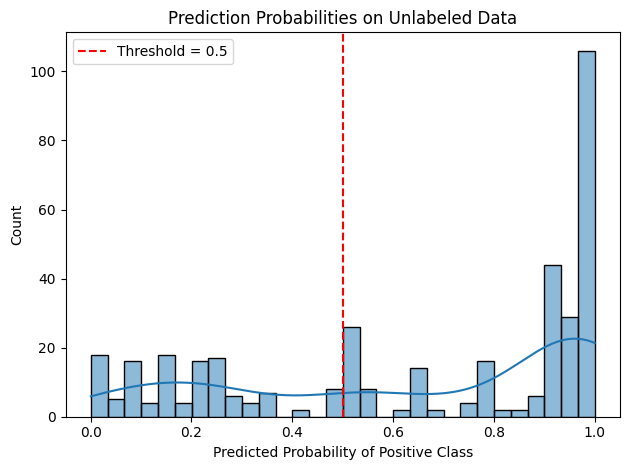

In [20]:
sns.histplot(proba_unlabeled, bins=30, kde=True)
plt.axvline(0.5, color='red', linestyle='--', label='Threshold = 0.5')
plt.title("Prediction Probabilities on Unlabeled Data")
plt.xlabel("Predicted Probability of Positive Class")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
high_conf = df_unlabeled[df_unlabeled['predicted_proba'] >= 0.9]
top_10 = high_conf.sort_values(by='predicted_proba', ascending=False).head(20)
print(top_10[['solvent', 'mx', 'predicted_proba']])

                 solvent     mx  predicted_proba
202    diethylene glycol  Mo2C1              1.0
203    diethylene glycol  Mo2C1              1.0
97     diethylene glycol  Nb2C1              1.0
98     diethylene glycol  Nb2C1              1.0
149    diethylene glycol   V2C1              1.0
150    diethylene glycol   V2C1              1.0
361    diethylene glycol   V4C3              1.0
362    diethylene glycol   V4C3              1.0
414    diethylene glycol  Ta4C3              1.0
415    diethylene glycol  Ta4C3              1.0
255    diethylene glycol  Ti2C1              1.0
256    diethylene glycol  Ti2C1              1.0
60     diethylene glycol  Ti3C2              1.0
308    diethylene glycol  Zr3C2              1.0
309    diethylene glycol  Zr3C2              1.0
194  Propylene Carbonate  Mo2C1              1.0
195  Propylene Carbonate  Mo2C1              1.0
89   Propylene Carbonate  Nb2C1              1.0
90   Propylene Carbonate  Nb2C1              1.0
141  Propylene Carbo

In [22]:
low_conf = df_unlabeled[df_unlabeled['predicted_proba'] <= 0.1]
bottom_10 = low_conf.sort_values(by='predicted_proba', ascending=True).head(20)

print("MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):")
print(bottom_10[['mx', 'solvent', 'predicted_proba']])

MXene-solvent pairs predicted to NOT work at all (P ≤ 0.1):
        mx          solvent  predicted_proba
315  Zr3C2  Dichloromethane         0.000418
314  Zr3C2  Dichloromethane         0.000418
63   Ti3C2  Dichloromethane         0.000418
262  Ti2C1  Dichloromethane         0.001267
261  Ti2C1  Dichloromethane         0.001267
421  Ta4C3  Dichloromethane         0.001416
420  Ta4C3  Dichloromethane         0.001416
368   V4C3  Dichloromethane         0.001475
367   V4C3  Dichloromethane         0.001475
156   V2C1  Dichloromethane         0.001507
155   V2C1  Dichloromethane         0.001507
104  Nb2C1  Dichloromethane         0.001651
103  Nb2C1  Dichloromethane         0.001651
209  Mo2C1  Dichloromethane         0.002381
208  Mo2C1  Dichloromethane         0.002381
323  Zr3C2    Triethylamine         0.027497
322  Zr3C2    Triethylamine         0.027497
67   Ti3C2    Triethylamine         0.027508
303  Zr3C2          Toluene         0.049957
302  Zr3C2          Toluene         0.04

In [23]:
print("\n=== Summary of predicted probabilities on unlabeled data ===")
print(df_unlabeled['predicted_proba'].describe())

# Count how many samples fall into different confidence zones
bins = [0.0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
labels = ['Very Low (≤0.1)', 'Low (0.1–0.3)', 'Mid (0.3–0.5)',
          'High (0.5–0.7)', 'Very High (0.7–0.9)', 'Extremely High (>0.9)']

df_unlabeled['confidence_bin'] = pd.cut(df_unlabeled['predicted_proba'], bins=bins, labels=labels, include_lowest=True)
print("\n=== Prediction count by confidence bin ===")
print(df_unlabeled['confidence_bin'].value_counts().sort_index())


=== Summary of predicted probabilities on unlabeled data ===
count    386.000000
mean       0.649698
std        0.355418
min        0.000418
25%        0.259499
50%        0.791614
75%        0.970820
max        1.000000
Name: predicted_proba, dtype: float64

=== Prediction count by confidence bin ===
confidence_bin
Very Low (≤0.1)           39
Low (0.1–0.3)             65
Mid (0.3–0.5)             21
High (0.5–0.7)            52
Very High (0.7–0.9)       30
Extremely High (>0.9)    179
Name: count, dtype: int64


Again, use the below if running in colab

In [29]:
train_path = f"{drive_path}/master/code-data/training/"

In [ ]:
df_unlabeled.to_csv(f"{train_path}/003_positive_vs_negative_predictions_on_unlabeled_svc.csv")
df_unlabeled.to_pickle(f"{train_path}/003_positive_vs_negative_predictions_on_unlabeled_svc.pkl")


If running locally, use the below

In [24]:
df_unlabeled.to_csv(f"003_positive_vs_negative_predictions_on_unlabeled_svc.csv")
df_unlabeled.to_pickle(f"003_positive_vs_negative_predictions_on_unlabeled_svc.pkl")

Main body of code

                                             Feature    Importance
boiling_point                          boiling_point  1.329844e+00
xn                                                xn  9.088494e-01
xlogp                                          xlogp  7.951229e-01
xd                                                xd  6.938653e-01
tpsa                                            tpsa  6.826412e-01
complexity                                complexity  5.968147e-01
h_bond_donor_count                h_bond_donor_count  5.961344e-01
p                                                  p  5.726426e-01
rotatable_bond_count            rotatable_bond_count  5.327956e-01
h_bond_acceptor_count          h_bond_acceptor_count  2.314571e-01
molecular_weight                    molecular_weight  1.592428e-01
heavy_atom_count                    heavy_atom_count  1.304905e-01
has_inversion_symmetry_oh  has_inversion_symmetry_oh  9.514488e-02
has_inversion_symmetry_f    has_inversion_symmetry_f  9.514488

C:\Users\liamr\AppData\Local\Temp\ipykernel_3228\1863205878.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


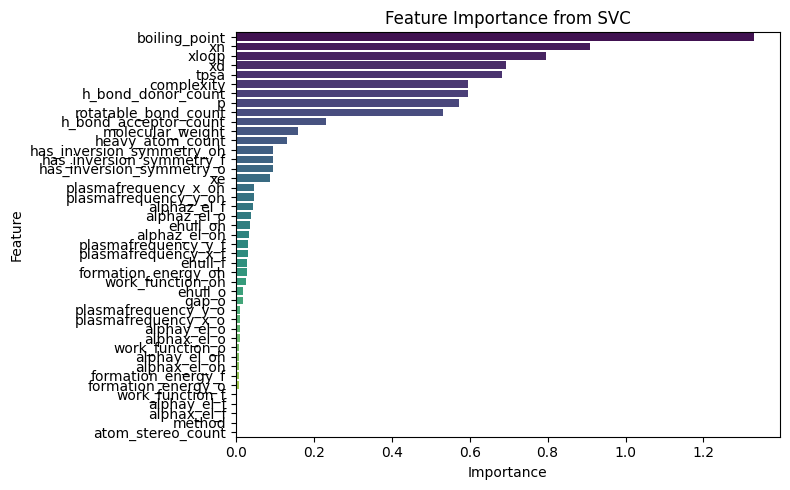

In [25]:
feature_names = features
importances = pd.Series(abs(clf.coef_[0]), index=feature_names)

# Create a DataFrame for better visualization
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Feature Importance from SVC')
plt.tight_layout()
plt.show()

Top 10 Feature Importances:
                                     Feature  Importance
boiling_point                  boiling_point    1.329844
xn                                        xn    0.908849
xlogp                                  xlogp    0.795123
xd                                        xd    0.693865
tpsa                                    tpsa    0.682641
complexity                        complexity    0.596815
h_bond_donor_count        h_bond_donor_count    0.596134
p                                          p    0.572643
rotatable_bond_count    rotatable_bond_count    0.532796
h_bond_acceptor_count  h_bond_acceptor_count    0.231457


C:\Users\liamr\AppData\Local\Temp\ipykernel_3228\692532943.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')


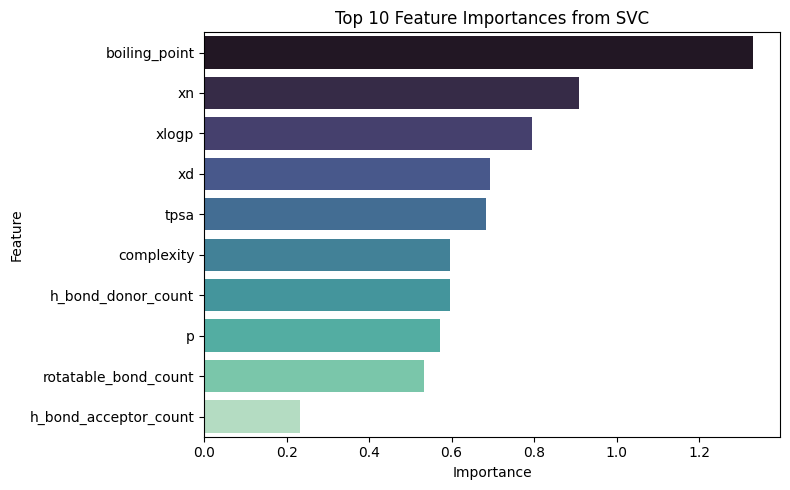

In [26]:

# Create and sort feature importance DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(10)  # Change to .head(15) for top 15

# Print top features
print("Top 10 Feature Importances:")
print(feat_imp_df)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='mako')
plt.title('Top 10 Feature Importances from SVC')
plt.tight_layout()
plt.show()